In [1]:
import glob
import pandas as pd
import numpy as np 
from astropy.time import Time
from astropy.table import Table, vstack
from astropy.io import fits
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import time
from scipy.stats import sem
from datetime import datetime, timezone
from python_modules.muonpipe import usefull_func
from matplotlib.patches import Circle
import matplotlib.patches as patches
from matplotlib.patches import RegularPolygon
import numpy as np

def format_axes(ax,option):
    
    if(option=='width'):
        ax.set_xlabel('Muon radius [deg]')
        ax.set_ylabel('Muon ring width [deg]')
        ax.grid(linestyle="dashed")
        ax.set_ylim(0.042,0.14)
        ax.set_xlim(1.0,1.23)
        ax.legend()
    if(option=='size'):
        ax2.grid(linestyle="dashed")
        ax2.legend(ncol=2)
        ax2.set_xlabel('Muon radius [deg]')
        ax2.set_ylabel('Muon Size [pe]')
        ax2.set_ylim(1800,3000)
        ax2.set_xlim(1.0,1.22)

# Define the path to your .dat file
file_path = '/Users/vdk/Downloads/lst-sim-config-sim-telarray-lst-magic-prod2-v1.4/mirror_CTA-N-LST1_v2019-03-31.dat'

# Lists to hold the extracted data from the first two columns
first_column = []
second_column = []

# Open the file and read the data
with open(file_path, 'r') as file:
    for line in file:
        # Split the line into a list of elements based on whitespace
        columns = line.split()
        # Check if the line has enough columns
        if len(columns) >= 2 and line[0] != '#':
            # Append the data from the first two columns to their respective lists
            first_column.append(float(columns[0]))
            second_column.append(float(columns[1]))

# Output the lists
print("First column:", first_column)
print("Second column:", second_column)
start_date_2019 = datetime.strptime("2019-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2019 = datetime.strptime("2019-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
    
start_date_2020 = datetime.strptime("2020-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2020 = datetime.strptime("2020-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2021 = datetime.strptime("2021-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2021 = datetime.strptime("2021-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2022 = datetime.strptime("2022-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2022 = datetime.strptime("2022-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2023 = datetime.strptime("2023-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2023 = datetime.strptime("2023-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2024 = datetime.strptime("2024-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2024 = datetime.strptime("2024-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_18188/2681100642.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'seaborn'

### Choose cuts on the time based on the datacheks

In [ ]:
files = glob.glob('/Users/vdk/muons2024/v0.9-v0.10/20*/DL1_datacheck_*.h5')
files.sort()

# This takes a few minutes... DON'T RUN IT MORE THAN ONCE, it is not needed! (If you change the 
# sky region or the cuts just execute the cells from "Data selection configuration" onwards)
dummy = []
dummy2 = []
dummy3 = []

missing_flatfield_tables = 0
for i, file in enumerate(files):
    if i%10 == 0:
        print(i, '/', len(files), file)
    try:
        dummy.append(pd.read_hdf(file, 'cosmics_intensity_spectrum'))
        dummy2.append(pd.read_hdf(file, 'runsummary'))
        fftable = pd.read_hdf(file, 'flatfield', errors='ignore')
        dummy3.append(fftable)
    except: 
            # some check files have no flatfield table at all (if calibox was off) 
        missing_flatfield_tables += 1

# cosmics intensity spectra table (subrun-wise):
cis = pd.concat(dummy, ignore_index=True)

# flatfield table (subrun-wise):
flatfield = pd.concat(dummy3, ignore_index=True)

# parameters computed run-wise:
runsummary = pd.concat(dummy2, ignore_index=True)



0 / 541 /Users/vdk/muons2024/v0.9-v0.10/20191123/DL1_datacheck_20191123.h5
10 / 541 /Users/vdk/muons2024/v0.9-v0.10/20200131/DL1_datacheck_20200131.h5
20 / 541 /Users/vdk/muons2024/v0.9-v0.10/20200618/DL1_datacheck_20200618.h5
30 / 541 /Users/vdk/muons2024/v0.9-v0.10/20200722/DL1_datacheck_20200722.h5
40 / 541 /Users/vdk/muons2024/v0.9-v0.10/20200817/DL1_datacheck_20200817.h5
50 / 541 /Users/vdk/muons2024/v0.9-v0.10/20200918/DL1_datacheck_20200918.h5
60 / 541 /Users/vdk/muons2024/v0.9-v0.10/20201123/DL1_datacheck_20201123.h5
70 / 541 /Users/vdk/muons2024/v0.9-v0.10/20201217/DL1_datacheck_20201217.h5
80 / 541 /Users/vdk/muons2024/v0.9-v0.10/20210212/DL1_datacheck_20210212.h5
90 / 541 /Users/vdk/muons2024/v0.9-v0.10/20210311/DL1_datacheck_20210311.h5
100 / 541 /Users/vdk/muons2024/v0.9-v0.10/20210321/DL1_datacheck_20210321.h5
110 / 541 /Users/vdk/muons2024/v0.9-v0.10/20210420/DL1_datacheck_20210420.h5
120 / 541 /Users/vdk/muons2024/v0.9-v0.10/20210512/DL1_datacheck_20210512.h5
130 / 541 

In [ ]:
runsummary.columns

Index(['runnumber', 'time', 'elapsed_time', 'min_altitude', 'mean_altitude',
       'max_altitude', 'min_azimuth', 'max_azimuth', 'mean_azimuth', 'mean_ra',
       'mean_dec', 'num_cosmics', 'num_pedestals', 'num_flatfield',
       'num_unknown_ucts_trigger_tags', 'num_wrong_ucts_tags_in_cosmics',
       'num_wrong_ucts_tags_in_pedestals', 'num_wrong_ucts_tags_in_flatfield',
       'num_ucts_jumps', 'num_unknown_tib_trigger_tags',
       'num_wrong_tib_tags_in_cosmics', 'num_wrong_tib_tags_in_pedestals',
       'num_wrong_tib_tags_in_flatfield', 'num_pedestals_after_cleaning',
       'num_contained_mu_rings', 'ff_charge_mean', 'ff_charge_mean_err',
       'ff_charge_stddev', 'ff_time_mean', 'ff_time_mean_err',
       'ff_time_stddev', 'ff_rel_time_stddev', 'ped_charge_mean',
       'ped_charge_mean_err', 'ped_charge_stddev',
       'ped_fraction_pulses_above10', 'ped_fraction_pulses_above30',
       'cosmics_fraction_pulses_above10', 'cosmics_fraction_pulses_above30',
       'mu_effi_m

### Process low_nsb csv muon files

In [ ]:
#muon_files = glob.glob('/Users/vdk/muons2024/all_muon_fits/*')
muon_files = glob.glob('/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/*')
print(sorted(muon_files))
#df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[0:5]] # [0:5] for 19-22 years, [5:] for 22-23 years
df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)] 
df_all_data = pd.concat(df_files, ignore_index=True)
df_good_data = df_all_data[(df_all_data['muon_efficiency'] < 1)] # & (df_all_data['ring_containment'] > 0.999) & (df_all_data['size_outside'] < 500)]# & (df_all_data['ring_completeness'] > 0.8)]
#df_good_data = df_all_data[(df_all_data['ring_containment'] > 0.999) & (df_all_data['size_outside'] < 500)]# & (df_all_data['ring_completeness'] > 0.8)]
del(df_all_data)
df_good_data


['/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/1_0-25k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/2_25-50k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/3_50-75k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/4_75-100k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/5_100-125k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/6_125-150k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/7_150-175k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/8_0-600fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/91_1200-1800fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/92_v010_1stHalf_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/93_v010_2ndHalf_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/9_600-1200fits_lowNSB.csv']


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_787/2773853474.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_787/2773853474.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_787/2773853474.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_787/2773853474.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_mem

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,60.0,1.574637e+09,-1.0,2311.1147,0.000000,-0.975512,-0.354570,1.038939,0.066076,1.0,...,6.481509,6.331281,1.387386,0.059634,-0.111103,0.311915,371.0,0.039351,13.0,0.0
1,287.0,1.574637e+09,-1.0,2646.7896,0.000000,0.353987,0.463572,1.192394,0.039972,1.0,...,6.638931,0.768292,6.594326,0.042449,0.208130,0.457135,493.0,0.104818,15.0,0.0
2,815.0,1.574637e+09,-1.0,2682.9595,0.000000,0.200454,0.503540,1.155244,0.050399,1.0,...,5.826689,5.821747,-0.239914,0.049087,0.312026,0.410487,478.0,0.048045,17.0,0.0
3,1248.0,1.574637e+09,-1.0,2802.3580,0.000000,0.719930,0.076793,1.203815,0.034111,1.0,...,4.560473,1.679653,4.239891,0.038754,0.229592,0.123887,499.0,0.371614,19.0,0.0
4,1573.0,1.574637e+09,-1.0,2121.7700,0.000000,-0.878445,0.215899,1.024937,0.093730,1.0,...,8.680637,-3.656715,-7.872858,0.077182,-0.073894,0.545917,358.0,0.000755,14.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26357613,5055075.0,1.674713e+09,-1.0,1242.5120,0.000000,-1.224233,2.159202,1.161522,0.080167,True,...,6.374878,-0.132690,6.373497,0.069734,-1.031511,0.640002,182.0,0.277134,10.0,0.0
26357614,5055159.0,1.674713e+09,-1.0,2182.8315,0.000000,0.045469,-0.660867,1.009607,0.071180,True,...,5.291778,5.289639,-0.150436,0.062548,-0.373700,0.266113,353.0,0.320824,10.0,0.0
26357615,5055180.0,1.674713e+09,-1.0,2119.8528,81.346530,0.501732,0.109346,0.891445,0.089546,True,...,5.857258,5.855136,-0.157671,0.092540,-0.898507,0.739353,274.0,0.804299,12.0,0.0
26357616,5056311.0,1.674713e+09,-1.0,1821.9410,6.692784,-0.431301,0.734208,0.981532,0.112360,True,...,9.194141,5.191974,-7.587862,0.091770,-0.250212,-0.288611,327.0,0.404962,12.0,0.0


In [ ]:
upper_zenith_limit = 80
lower_zenith_limit = 60
upper_azimuth_limit = 185
lower_azimuth_limit = 175

# Choose only runs with zenith anlge < 5 degrees and then create two tables with the time of start and time of end
# runnumbers = cis['runnumber'][(cis['cos_zenith'] >= np.cos(np.deg2rad(upper_zenith_limit))) & 
#                               (cis['cos_zenith'] <= np.cos(np.deg2rad(lower_zenith_limit))) & 
#                               (cis['az_tel'] >= np.deg2rad(lower_azimuth_limit)) & 
#                               (cis['az_tel'] <= np.deg2rad(upper_azimuth_limit))]
runnumbers = runsummary['runnumber'][
    (runsummary['mean_altitude'] >= np.deg2rad(lower_zenith_limit)) & 
    (runsummary['mean_altitude'] <= np.deg2rad(upper_zenith_limit)) & 
    (runsummary['mean_azimuth'] >= np.deg2rad(lower_azimuth_limit)) & 
    (runsummary['mean_azimuth'] <= np.deg2rad(upper_azimuth_limit))
]
#zenith_table_cis = cis[cis['runnumber']].isin(runnumbers)
zenith_table = runsummary[runsummary['runnumber'].isin(runnumbers)]
start_table = zenith_table['time']
end_table = zenith_table['time']+zenith_table['elapsed_time']
# for index,row in new_table.iterrow:
#     print(row)
#for start, end in zip(start_table, end_table):
    #print(f"start = {start} / end = {end} and difference = {start - end}")

#zenith_table.to_csv('/Users/vdk/muons2024/data_zenith_cuts/zenith<5deg.csv', index=False)
zenith_table


,runnumber,time,elapsed_time,min_altitude,mean_altitude,max_altitude,min_azimuth,max_azimuth,mean_azimuth,mean_ra,...,cosmics_fraction_pulses_above10,cosmics_fraction_pulses_above30,mu_effi_mean,mu_effi_stddev,mu_width_mean,mu_width_stddev,mu_hg_peak_sample_mean,mu_hg_peak_sample_stddev,mu_intensity_mean,mean_number_of_pixels_nearby_stars
560,3605,1.613108e+09,1204.113848,1.152637,1.154845,1.155773,3.056959,3.271043,3.164232,206.087334,...,0.006702,0.001267,0.173390,0.019483,0.069832,0.023819,24.030383,1.412485,2136.362793,71.545455
725,4041,1.615772e+09,303.563029,1.313021,1.313742,1.314369,3.037234,3.119883,3.078025,180.848863,...,0.004197,0.000703,0.173835,0.014934,0.066339,0.020285,23.216106,1.337903,2167.272705,4.738095
832,4205,1.616377e+09,911.588448,1.272439,1.275112,1.276341,2.972925,3.193302,3.079570,187.702871,...,0.020018,0.002644,0.189964,0.019592,0.092080,0.021934,14.775949,1.570574,1971.913574,23.114943
844,4343,1.617941e+09,1205.866911,1.257552,1.261744,1.263404,3.063692,3.345311,3.205513,239.340368,...,0.004216,0.000714,0.166421,0.014964,0.065864,0.020095,16.597308,1.464871,2074.397949,5.736842
852,4369,1.618113e+09,913.831255,1.260013,1.262397,1.263387,3.079390,3.292973,3.186641,238.523502,...,0.003805,0.000644,0.166232,0.018518,0.065437,0.023901,16.945898,1.510806,2089.935547,23.866197
888,4462,1.618704e+09,1023.691789,1.286761,1.289249,1.290305,3.045177,3.304445,3.175304,187.703161,...,0.006100,0.001114,0.168339,0.013783,0.068069,0.020024,17.583811,1.638365,2067.012207,0.000000
967,4636,1.620427e+09,683.091250,1.281679,1.282718,1.283234,3.037022,3.203307,3.122211,188.116533,...,0.004061,0.000716,0.164145,0.014525,0.063544,0.019902,17.447090,1.641523,2063.581299,21.072917
2298,7517,1.648608e+09,744.932930,1.293751,1.295237,1.295906,3.014766,3.207619,3.111176,211.101928,...,0.004598,0.000988,0.167934,0.013080,0.073058,0.018289,10.413357,1.729751,2079.372314,36.549020
2597,8060,1.651458e+09,1115.582031,1.260355,1.262272,1.263239,2.999218,3.260527,3.130302,238.528999,...,0.004520,0.000770,0.168140,0.013678,0.068180,0.019562,10.049887,1.693499,2090.471924,23.763514
2661,8135,1.651722e+09,1120.635690,1.133297,1.137410,1.139397,2.962486,3.154765,3.058264,262.102618,...,0.004593,0.000744,0.170849,0.014791,0.070713,0.019297,9.422636,1.910444,2103.407471,48.453947


In [ ]:
max(runsummary['mean_azimuth'])

6.280712369964685

### Choose muon events that satisfy the condition

In [ ]:
# Conditions: Select rows where Column1 is greater than 2 and Column2 is 'D' or 'E'
#df_zenith_cut = pd.read_csv('/Users/vdk/muons2024/data_zenith_cuts/zenith<5deg.csv', na_values=['NA', '?'])
df_zenith_cut = zenith_table
filtered_frames = []
for index, row in df_zenith_cut.iterrows():
    #print(f"time of start of the run = {datetime.fromtimestamp(row['time'][index]).strftime('%Y-%m-%d %H:%M:%S.%f')} and end of the run = {datetime.fromtimestamp(max(row['time'][index] + row['elapsed_time'][index])).strftime('%Y-%m-%d %H:%M:%S.%f')}")
    filtered_df = df_good_data[(df_good_data['event_time'] >= row['time']) & (df_good_data['event_time'] <= (row['time'] + row['elapsed_time']))]
    filtered_frames.append(filtered_df)
    #df_cut_data = pd.concat(filtered_df, ignore_index=True)

In [ ]:
final_df = pd.concat(filtered_frames, ignore_index=True)
#final_df = final_df[(final_df['ring_completeness'] > 0.5)]
final_df

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,2626373.0,1.613108e+09,-1.0,1991.1802,6.043215,0.210694,-0.946331,1.094463,0.071526,True,...,8.368082,-0.879317,8.321754,0.066102,0.095273,0.295963,417.0,0.273342,24.0,0.0
1,2626585.0,1.613108e+09,-1.0,2294.9644,0.000000,0.327868,0.440483,1.206018,0.065227,True,...,9.233872,-6.359787,-6.694588,0.060255,0.242752,-0.017609,509.0,0.149156,25.0,0.0
2,2628205.0,1.613108e+09,-1.0,2405.6064,0.000000,-0.953200,0.225543,1.179227,0.045823,True,...,7.276103,4.658880,5.588963,0.046229,0.001221,-0.378707,456.0,0.222045,24.0,0.0
3,2628972.0,1.613108e+09,-1.0,2266.6702,0.000000,-0.906430,-0.185670,1.192432,0.068064,True,...,8.975098,-7.662531,-4.673115,0.058843,0.402070,-0.003300,476.0,0.118627,24.0,0.0
4,2630529.0,1.613108e+09,-1.0,1729.3990,0.000000,1.157782,0.247777,1.063302,0.088820,True,...,7.496979,6.657894,3.446323,0.072484,-0.170015,-0.328968,354.0,0.053762,24.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130885,1128961.0,1.709159e+09,-1.0,2384.9827,0.000000,-0.711481,0.095503,1.150645,0.045607,True,...,5.036693,-0.241893,5.030881,0.044792,-0.150976,-0.035021,458.0,0.163360,14.0,0.0
130886,1129427.0,1.709159e+09,-1.0,1667.8628,0.000000,0.459466,0.123991,0.951772,0.101966,True,...,9.006559,7.760314,4.571174,0.083986,0.152831,-0.531315,309.0,0.141890,11.0,0.0
130887,1129847.0,1.709159e+09,-1.0,1666.7123,0.000000,0.897436,-1.039633,1.029245,0.060844,True,...,5.411061,-2.516364,4.790354,0.051875,0.275165,0.446540,302.0,0.432818,13.0,0.0
130888,1130087.0,1.709159e+09,-1.0,2446.6396,0.000000,-0.542132,0.307300,1.159898,0.071538,True,...,4.352682,1.118487,4.206522,0.056941,0.175754,0.407790,466.0,0.261068,13.0,0.0


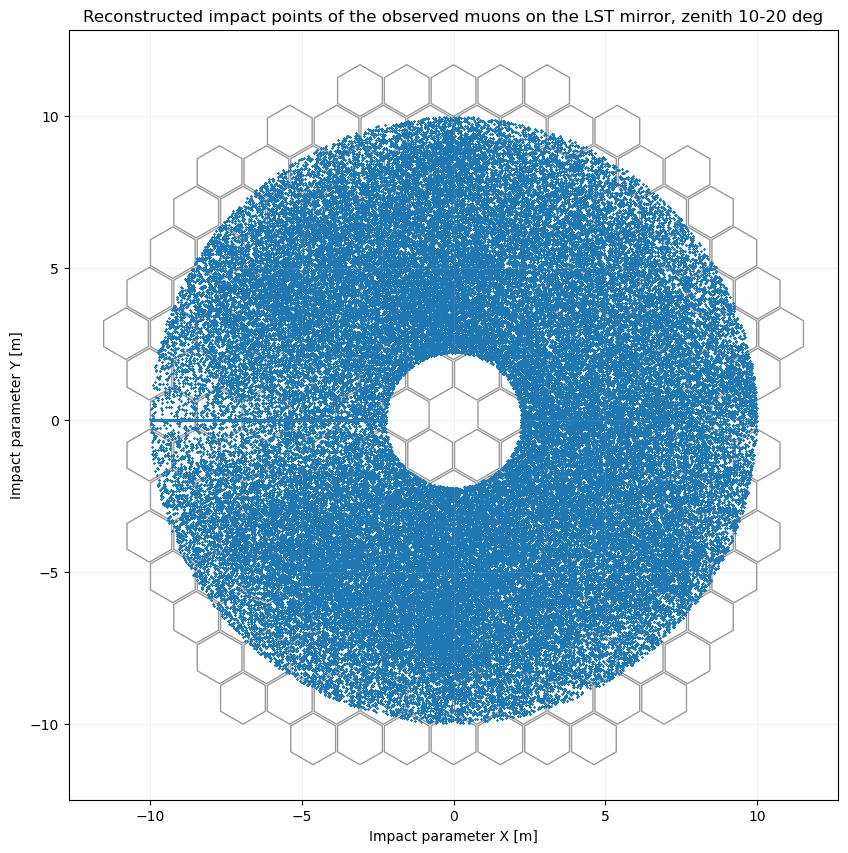

In [ ]:
alpha_value = 1
first_column = np.array(first_column)
second_column = np.array(second_column)

fig, ax = plt.subplots(figsize=(10,10))
# Create a circle patch
#circle = Circle((0, 0), 11.5, color='red', fill=False, label = 'LST1 full mirror')  # Center at (0.5, 0.5) with radius 0.2

# Add the circle to the Axes
#ax.add_patch(circle)

# for mirror_x, mirror_y in zip(first_column,second_column):
#     circle = Circle((mirror_y*0.01, (mirror_x*0.01-0.269)), 0.75, color='k', fill=False, alpha = 0.5)  # Center at (0.5, 0.5) with radius 0.2
#     ax.add_patch(circle)
# Set the aspect of the plot to equal to make sure the circle is not oval

for center_x, center_y in zip(first_column, second_column):
    hex = RegularPolygon((center_y*0.01, center_x*0.01-0.269), numVertices=6, radius=0.85, alpha=0.4, edgecolor='k', fill=False)
    ax.add_patch(hex)
plt.autoscale(enable = True)

ax.set_aspect('equal')

ax.scatter(final_df['impact_x_array'][
    (final_df['event_time'] > start_date_2023) & 
    (final_df['event_time'] < end_date_2024)], 
           final_df['impact_y_array'][
    (final_df['event_time'] > start_date_2023) & 
    (final_df['event_time'] < end_date_2024)
], alpha = alpha_value, s = 1, marker = 'x')

ax.set_xlabel("Impact parameter X [m]") 
ax.set_ylabel("Impact parameter Y [m]")
ax.set_title("Reconstructed impact points of the observed muons on the LST mirror, zenith 10-20 deg")
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
#plt.savefig(f'/Users/vdk/muons2024/images/ZenithImpactStudy/ImpactPoints_zenith20-30_2023year_2.png', dpi=200, format='png', bbox_inches='tight')
plt.grid(alpha=0.15)
plt.show()

In [ ]:
listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/0784-reflection/tables/*')
listdir2 = glob.glob('/Users/vdk/muons2024/lapalma_simulations/0684-reflection/tables/*')
listdir3 = glob.glob('/Users/vdk/muons2024/lapalma_simulations/0884-reflection/tables/*')


dat = Table.read('{}'.format(listdir[0]), format='fits')
for muon_file in listdir:
    dat2 = Table.read(muon_file, format='fits')
    dat = vstack([dat, dat2])
df = dat.to_pandas()
df_sim_data = df[df['good_ring'] & (df['muon_efficiency'] < 1)]# & (df['ring_containment'] > 0.999) & (df['size_outside'] < 500) & (df['ring_completeness'] > 0.9)]


dat = Table.read('{}'.format(listdir2[0]), format='fits')
for muon_file in listdir2:
    dat2 = Table.read(muon_file, format='fits')
    dat = vstack([dat, dat2])
df_2 = dat.to_pandas()
df_sim_data_2 = df_2[df_2['good_ring'] & (df_2['muon_efficiency'] < 1)]# & (df['ring_containment'] > 0.999) & (df_2['size_outside'] < 500) & (df_2['ring_completeness'] > 0.9)]


# dat = Table.read('{}'.format(listdir3[0]), format='fits')
# for muon_file in listdir3:
#     dat2 = Table.read(muon_file, format='fits')
#     dat = vstack([dat, dat2])
# df_3 = dat.to_pandas()
# df_good_data_3 = df_3[df_3['good_ring'] & (df['ring_containment'] > 0.999) & (df['muon_efficiency'] < 1) & (df['size_outside'] < 500) & (df_3['ring_completeness'] > 0.9)]

df_sim_data_2

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
3,4507,NaN,0.015043,1806.188843,0.0,1.173916,-0.416759,1.132083,0.066150,True,...,2.847894,-1.484166,2.430587,0.047980,-0.188184,-0.148442,367,1.174341,NaN,NaN
4,4509,NaN,0.015043,1909.206665,0.0,1.190788,-0.436071,1.139051,0.083611,True,...,4.529227,-3.010091,-3.384264,0.063551,-0.283029,-0.112735,369,1.194402,NaN,NaN
6,8400,NaN,0.018271,2256.793945,0.0,0.073389,-0.164379,1.167239,0.046556,True,...,3.744050,-3.594488,-1.047646,0.040340,0.043174,-0.374534,471,1.300344,NaN,NaN
7,8401,NaN,0.018271,2273.915527,0.0,0.071105,-0.153570,1.167130,0.051469,True,...,2.362466,-1.965332,1.310998,0.043022,0.110812,-0.377710,468,1.218131,NaN,NaN
8,8402,NaN,0.018271,2275.274414,0.0,0.066551,-0.149338,1.173320,0.038273,True,...,2.668649,-0.000600,2.668649,0.039215,-0.105155,-0.684140,474,1.199697,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786425,998207,NaN,0.013200,1711.613770,0.0,0.242746,-1.049476,1.120501,0.064691,True,...,8.248177,2.300967,7.920731,0.050663,-0.335308,0.464569,405,1.262014,NaN,NaN
786426,998208,NaN,0.013200,1860.315674,0.0,0.256280,-1.024424,1.125125,0.068939,True,...,7.284564,7.104292,-1.610562,0.050545,0.334895,-0.432074,413,1.239023,NaN,NaN
786427,998209,NaN,0.013200,2007.190918,0.0,0.238965,-1.038092,1.135083,0.068000,True,...,6.519594,5.559508,-3.405433,0.052901,-0.023548,-0.570019,421,1.238414,NaN,NaN
786428,1000001,NaN,0.082305,1921.677734,0.0,-0.821722,-0.885244,1.240981,0.045396,True,...,9.092401,8.529873,-3.148496,0.045602,0.129621,-0.445847,424,1.404427,NaN,NaN


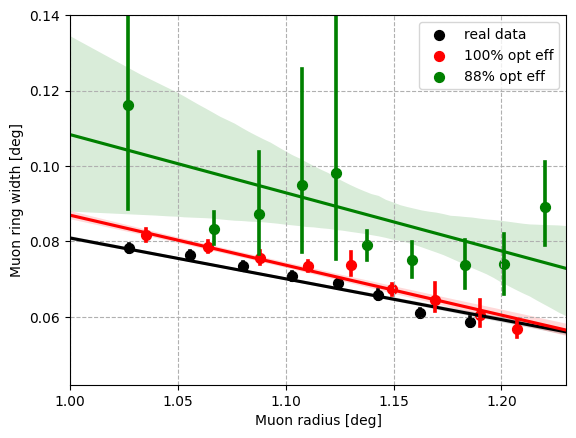

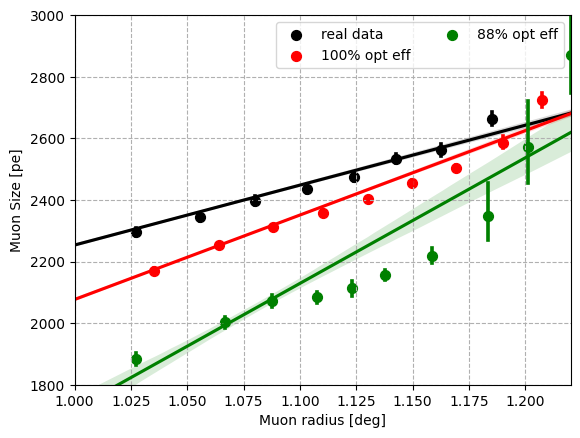

In [ ]:
size_outside = 500
ring_completeness = 0.9
ring_containment = 0.9
bin_number = 10

fig,ax = plt.subplots()
fig2,ax2 = plt.subplots()

sns.regplot(x = final_df['ring_radius'][(final_df['ring_completeness'] > ring_completeness) & 
                                        (final_df['size_outside'] < size_outside) &   
                                        (final_df['ring_containment'] > ring_containment)], 
            y = final_df['ring_width'][(final_df['ring_completeness'] > ring_completeness) & 
                                       (final_df['size_outside'] < size_outside) &  
                                       (final_df['ring_containment'] > ring_containment)], 
            x_bins=bin_number, ax=ax, color = 'k', label = 'real data')

sns.regplot(x = df_sim_data['ring_radius'][(df_sim_data['ring_completeness'] > ring_completeness) & 
                                           (df_sim_data['size_outside'] < size_outside) & 
                                           (df_sim_data['ring_containment'] > ring_containment)], 
            y = df_sim_data['ring_width'][(df_sim_data['ring_completeness'] > ring_completeness) & 
                                          (df_sim_data['size_outside'] < size_outside) & 
                                          (df_sim_data['ring_containment'] > ring_containment)], 
            x_bins=bin_number, ax=ax, color = 'r', label = '100% opt eff')

sns.regplot(x = df_sim_data_2['ring_radius'][(df_sim_data_2['ring_completeness'] > ring_completeness) & 
                                             (df_sim_data_2['size_outside'] < size_outside) &
                                             (df_sim_data_2['ring_containment'] > ring_containment)], 
            y = df_sim_data_2['ring_width'][(df_sim_data_2['ring_completeness'] > ring_completeness) & 
                                            (df_sim_data_2['size_outside'] < size_outside) & 
                                            (df_sim_data_2['ring_containment'] > ring_containment)], 
            x_bins=bin_number, ax=ax, color = 'green', label = '88% opt eff')

sns.regplot(x = final_df['ring_radius'][(final_df['ring_completeness'] > ring_completeness) & 
                                        (final_df['size_outside'] < size_outside) & 
                                        (final_df['ring_containment'] > ring_containment)], 
            y = final_df['ring_size'][(final_df['ring_completeness'] > ring_completeness) & 
                                      (final_df['size_outside'] < size_outside) & 
                                      (final_df['ring_containment'] > ring_containment)], 
            x_bins=bin_number, ax=ax2, color = 'k', label = 'real data')
sns.regplot(x = df_sim_data['ring_radius'][(df_sim_data['ring_completeness'] > ring_completeness) &
                                           (df_sim_data['size_outside'] < size_outside) & 
                                           (df_sim_data['ring_containment'] > ring_containment)], 
            y = df_sim_data['ring_size'][(df_sim_data['ring_completeness'] > ring_completeness) & 
                                         (df_sim_data['size_outside'] < size_outside) & 
                                         (df_sim_data['ring_containment'] > ring_containment)], 
            x_bins=bin_number, ax=ax2, color = 'r', label = '100% opt eff')
sns.regplot(x = df_sim_data_2['ring_radius'][(df_sim_data_2['ring_completeness'] > ring_completeness) & 
                                             (df_sim_data_2['size_outside'] < size_outside) &
                                             (df_sim_data_2['ring_containment'] > ring_containment)], 
            y = df_sim_data_2['ring_size'][(df_sim_data_2['ring_completeness'] > ring_completeness) & 
                                           (df_sim_data_2['size_outside'] < size_outside) &  
                                           (df_sim_data_2['ring_containment'] > ring_containment)], 
            x_bins=bin_number, ax=ax2, color = 'green', label = '88% opt eff')



format_axes(ax,'width')        
format_axes(ax2,'size') 

Mean value of the array = 1821.5103023879687 
Standard deviation = 300.47984863492485
Mean value of the array = 1919.255644898733 
Standard deviation = 385.41817258699336
Mean value of the array = 1779.1858842846787 
Standard deviation = 368.1933089825002


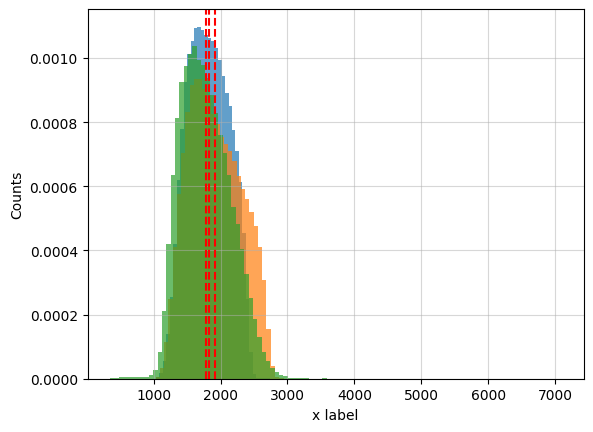

In [ ]:
usefull_func.hist_wo_outliers(df_sim_data_2['ring_size'], outlier_value=10000, mean_line=True, density=True)
usefull_func.hist_wo_outliers(df_sim_data['ring_size'], outlier_value=10000, mean_line=True, density=True)
usefull_func.hist_wo_outliers(final_df['ring_size'], outlier_value=10000, mean_line=True, density=True)

In [ ]:
len(df_sim_data)

459692

In [ ]:
len(df_sim_data_2['ring_size'][(df_sim_data_2['ring_completeness'] > 0.9) & (df_sim_data_2['size_outside'] < size_outside) &  (df_sim_data_2['ring_size'] < 3000) & (df_sim_data_2['ring_containment'] > 0.999) & (df_sim_data_2['muon_efficiency'] < 1)])

266

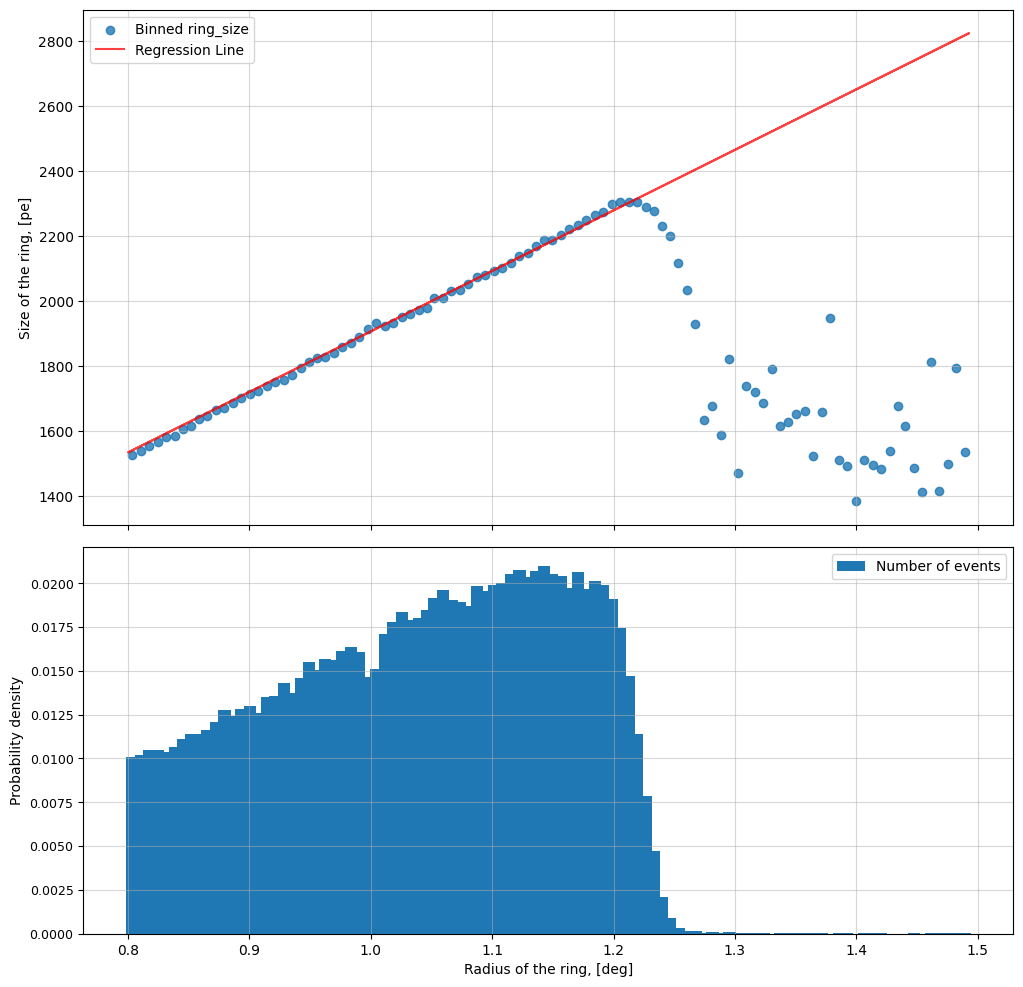

In [ ]:
x_value_str = 'ring_radius'
y_value_str = 'ring_size'

# Step 1: Create bins for 'ring_radius'
final_df[f'{x_value_str}_bin'] = pd.cut(final_df[x_value_str], bins=100)

# Step 2: Group by the new bin column and calculate mean 'ring_size' for each bin
binned_data = final_df.groupby(f'{x_value_str}_bin')[y_value_str].mean().reset_index()

# Step 3: Convert the bin intervals to strings (for plotting) or use midpoints
binned_data['bin_mid'] = binned_data[f'{x_value_str}_bin'].apply(lambda x: x.mid)

# Calculate number of elements in each bin
bin_counts = final_df.groupby(f'{x_value_str}_bin').size().reset_index(name='count')

# Merge the counts back with the mean calculations if needed
binned_data_with_counts = binned_data.merge(bin_counts, on=f'{x_value_str}_bin')


fig, axes = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 3]}, figsize=(12,12))
fig.subplots_adjust(hspace=0.05)
ax = axes[0]
ax.scatter(binned_data_with_counts['bin_mid'], binned_data_with_counts[y_value_str], label=f'Binned {y_value_str}', alpha = 0.8)
ax.set_ylabel('Size of the ring, [pe]')
m, b = np.polyfit(df_good_data[x_value_str], df_good_data[y_value_str], 1)
ax.plot(final_df[x_value_str], m*final_df[x_value_str] + b, color='red', label='Regression Line', alpha = 0.75)
ax.legend()
bx = axes[1]
x_pos = list(binned_data_with_counts['bin_mid'])
y_pos = np.array(binned_data_with_counts['count'])
y_pos = y_pos / sum(y_pos)
bx.bar(x_pos, y_pos, width=0.01, label="Number of events")
#bx.set_ylim(0,25000)
bx.set_ylabel('Probability density')
ax.grid(alpha = 0.5)
bx.grid(alpha = 0.5)
bx.legend()

bx.tick_params(axis="y", labelsize=9)
# Scatter plot of binned values


plt.xlabel('Radius of the ring, [deg]')
plt.legend()
plt.grid(alpha=0.5)


### LST mirrors

First column: [-1022.49, -1022.49, -1022.49, -1022.49, -1022.49, -1022.49, -1022.49, -889.12, -889.12, -889.12, -889.12, -889.12, -889.12, -889.12, -889.12, -889.12, -889.12, -755.75, -755.75, -755.75, -755.75, -755.75, -755.75, -755.75, -755.75, -755.75, -755.75, -755.75, -622.38, -622.38, -622.38, -622.38, -622.38, -622.38, -622.38, -622.38, -622.38, -622.38, -622.38, -622.38, -489.02, -489.02, -489.02, -489.02, -489.02, -489.02, -489.02, -489.02, -489.02, -489.02, -489.02, -489.02, -489.02, -355.65, -355.65, -355.65, -355.65, -355.65, -355.65, -355.65, -355.65, -355.65, -355.65, -355.65, -355.65, -355.65, -355.65, -222.28, -222.28, -222.28, -222.28, -222.28, -222.28, -222.28, -222.28, -222.28, -222.28, -222.28, -222.28, -222.28, -88.91, -88.91, -88.91, -88.91, -88.91, -88.91, -88.91, -88.91, -88.91, -88.91, -88.91, -88.91, -88.91, -88.91, 44.46, 44.46, 44.46, 44.46, 44.46, 44.46, 44.46, 44.46, 44.46, 44.46, 44.46, 44.46, 177.82, 177.82, 177.82, 177.82, 177.82, 177.82, 177.82, 177.82

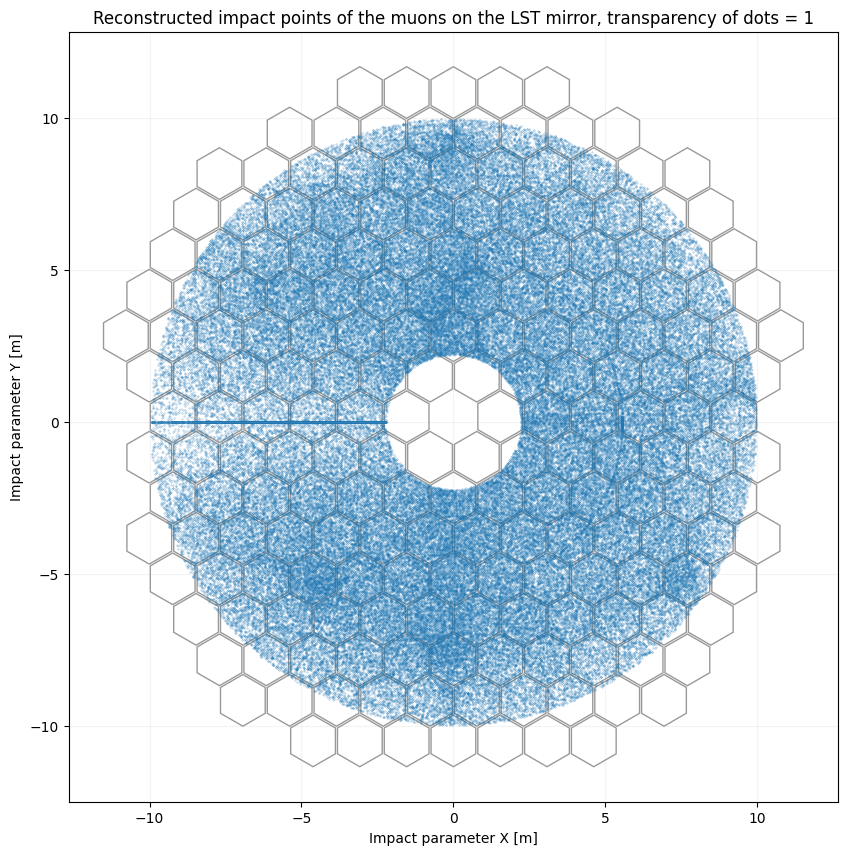

In [ ]:
alpha_value = 0.2
first_column = np.array(first_column)
second_column = np.array(second_column)

fig, ax = plt.subplots(figsize=(10,10))
# Create a circle patch
#circle = Circle((0, 0), 11.5, color='red', fill=False, label = 'LST1 full mirror')  # Center at (0.5, 0.5) with radius 0.2

# Add the circle to the Axes
#ax.add_patch(circle)

# for mirror_x, mirror_y in zip(first_column,second_column):
#     circle = Circle((mirror_y*0.01, (mirror_x*0.01-0.269)), 0.75, color='k', fill=False, alpha = 0.5)  # Center at (0.5, 0.5) with radius 0.2
#     ax.add_patch(circle)
# Set the aspect of the plot to equal to make sure the circle is not oval

for center_x, center_y in zip(first_column, second_column):
    hex = RegularPolygon((center_y*0.01, center_x*0.01-0.269), numVertices=6, radius=0.85, alpha=0.4, edgecolor='k', fill=False)
    ax.add_patch(hex)
plt.autoscale(enable = True)

ax.set_aspect('equal')

ax.scatter(final_df['impact_x_array'], final_df['impact_y_array'], alpha = alpha_value, s = 1, marker = 'x')
ax.set_xlabel("Impact parameter X [m]")
ax.set_ylabel("Impact parameter Y [m]")
ax.set_title("Reconstructed impact points of the muons on the LST mirror, transparency of dots = 1")
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
plt.savefig(f'/Users/vdk/muons2024/images/ZenithImpactStudy/ImpactPoints_zenith{lower_zenith_limit-upper_zenith_limit}.png', dpi=200, format='png', bbox_inches='tight')
plt.grid(alpha=0.15)
plt.show()

In [ ]:
final_df

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,1483522.0,1.595216e+09,-1.0,2060.8796,0.0,-0.398732,0.417430,1.009483,0.060957,True,...,4.513104,4.307919,1.345341,0.055003,0.095377,-0.339398,350.0,0.217773,12.0,0.0
1,1487429.0,1.595216e+09,-1.0,1710.1179,0.0,0.751504,0.006073,1.096633,0.107521,True,...,9.588553,9.246941,-2.536618,0.071386,0.144475,-0.119612,419.0,0.405036,14.0,0.0
2,1489230.0,1.595216e+09,-1.0,1918.7657,0.0,0.173183,-0.735863,0.994447,0.071442,True,...,3.029689,-0.586811,-2.972317,0.060420,0.191670,-0.296240,338.0,0.192667,14.0,0.0
3,1489512.0,1.595216e+09,-1.0,1739.4664,0.0,-0.730863,0.119663,0.940111,0.068196,True,...,7.152984,7.152984,-0.000329,0.055657,0.062382,0.964884,306.0,0.373187,14.0,0.0
4,1491559.0,1.595216e+09,-1.0,1725.5531,0.0,-0.001798,-0.998314,1.058896,0.110205,True,...,9.152031,4.435404,8.005427,0.086773,0.072672,-0.807283,389.0,0.259793,14.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160667,2949714.0,1.707170e+09,-1.0,1678.7240,0.0,0.103740,-0.129833,1.211605,0.087320,True,...,9.849244,1.851501,9.673652,0.070531,0.128000,0.409568,506.0,-0.009505,11.0,0.0
160668,2951398.0,1.707170e+09,-1.0,1495.6018,0.0,0.606024,-1.438295,1.059349,0.087953,True,...,9.845046,-1.045055,-9.789423,0.077668,-0.078012,-0.458850,275.0,0.120822,11.0,0.0
160669,2952313.0,1.707170e+09,-1.0,1815.2664,0.0,0.474058,-0.646397,1.022222,0.074689,True,...,7.745583,-6.380367,-4.391466,0.063026,-0.413436,-0.012586,364.0,0.411886,11.0,0.0
160670,2952621.0,1.707170e+09,-1.0,1670.9695,0.0,0.067687,-1.366729,1.212359,0.048365,True,...,9.365979,-6.945303,-6.283655,0.046755,0.412348,0.751320,358.0,0.186822,11.0,0.0


In [3]:
upper_zenith_limit = 40
lower_zenith_limit = 45
upper_azimuth_limit = 110
lower_azimuth_limit = 106

# Choose only runs with zenith anlge < 5 degrees and then create two tables with the time of start and time of end
runnumbers = cis['runnumber'][(cis['cos_zenith'] >= np.cos(np.deg2rad(upper_zenith_limit))) & 
                              (cis['cos_zenith'] <= np.cos(np.deg2rad(lower_zenith_limit))) & 
                              (cis['az_tel'] >= np.deg2rad(lower_azimuth_limit)) & 
                              (cis['az_tel'] <= np.deg2rad(upper_azimuth_limit))]
#zenith_table_cis = cis[cis['runnumber']].isin(runnumbers)
zenith_table = runsummary[runsummary['runnumber'].isin(runnumbers)]
start_table = zenith_table['time']
end_table = zenith_table['time']+zenith_table['elapsed_time']
# for index,row in new_table.iterrow:
#     print(row)
#for start, end in zip(start_table, end_table):
    #print(f"start = {start} / end = {end} and difference = {start - end}")

#zenith_table.to_csv('/Users/vdk/muons2024/data_zenith_cuts/zenith<5deg.csv', index=False)
zenith_table
# Conditions: Select rows where Column1 is greater than 2 and Column2 is 'D' or 'E'
filtered_frames = []
for index, row in zenith_table.iterrows():
    print(f"time of start of the run = {row['time']} and end of the run = {row['time'] + row['elapsed_time']}")
    filtered_df = df_good_data[(df_good_data['event_time'] >= row['time']) & (df_good_data['event_time'] <= (row['time'] + row['elapsed_time']))]
    filtered_frames.append(filtered_df)
    #df_cut_data = pd.concat(filtered_df, ignore_index=True)    

final_df = pd.concat(filtered_frames, ignore_index=True)
final_df



NameError: name 'cis' is not defined

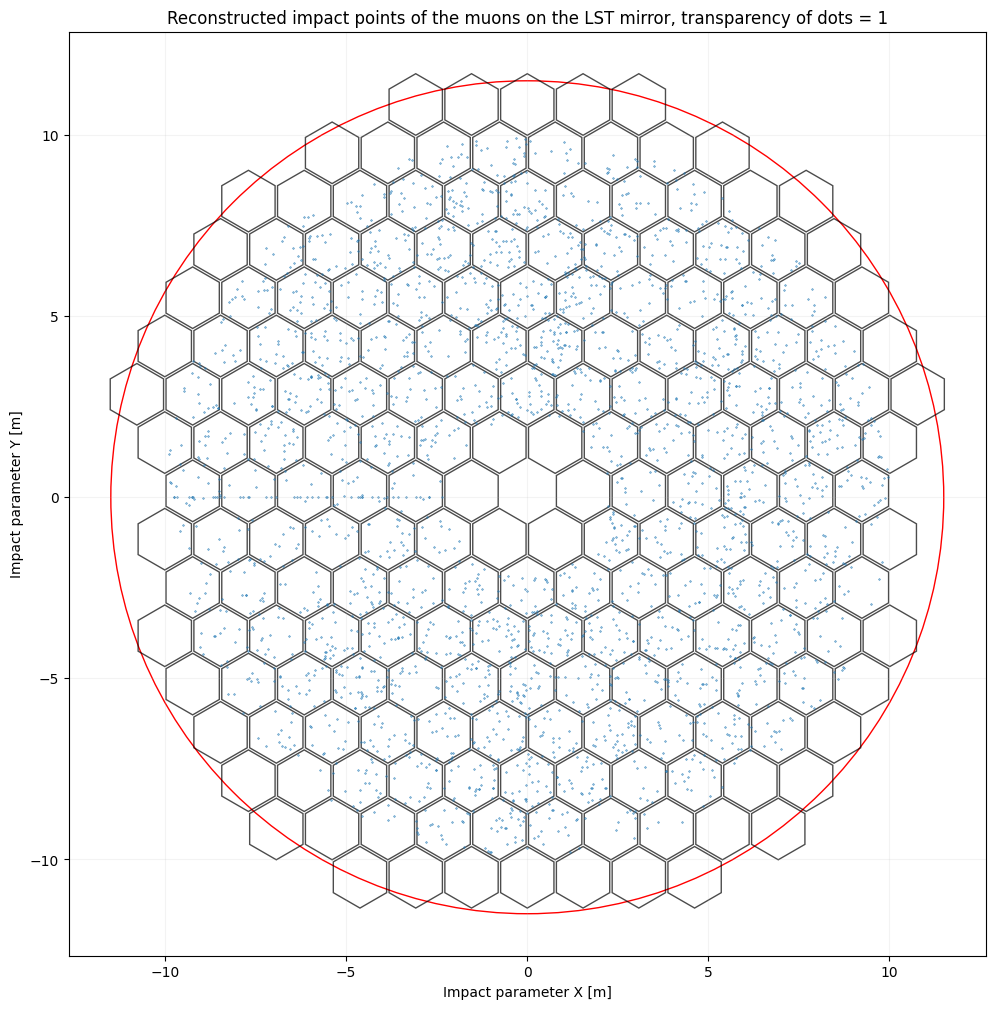

In [ ]:
# Create a new figure and an axes instance
fig, ax = plt.subplots(figsize=(12,12))
# Create a circle patch
circle = Circle((0, 0), 11.5, color='red', fill=False, label = 'LST1 full mirror')  # Center at (0.5, 0.5) with radius 0.2

alpha_value = 0.5

# Add the circle to the Axes
ax.add_patch(circle)
for center_x, center_y in zip(first_column, second_column):
    hex = RegularPolygon((center_y*0.01, center_x*0.01-0.269), numVertices=6, radius=0.85, alpha=0.7, edgecolor='k', fill=False)
    ax.add_patch(hex)
plt.autoscale(enable = True)

ax.set_aspect('equal')
# Set the aspect of the plot to equal to make sure the circle is not oval
ax.set_aspect('equal')

ax.scatter(final_df['impact_x_array'], final_df['impact_y_array'], alpha = alpha_value, s = 1, marker = 'x')
ax.set_xlabel("Impact parameter X [m]")
ax.set_ylabel("Impact parameter Y [m]")
ax.set_title("Reconstructed impact points of the muons on the LST mirror, transparency of dots = 1")
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
#plt.savefig('/Users/vdk/muons2024/images/ImpactPoints_19-23Y_Alpha1.png', dpi=200, format='png', bbox_inches='tight')
plt.grid(alpha=0.15)
plt.show()

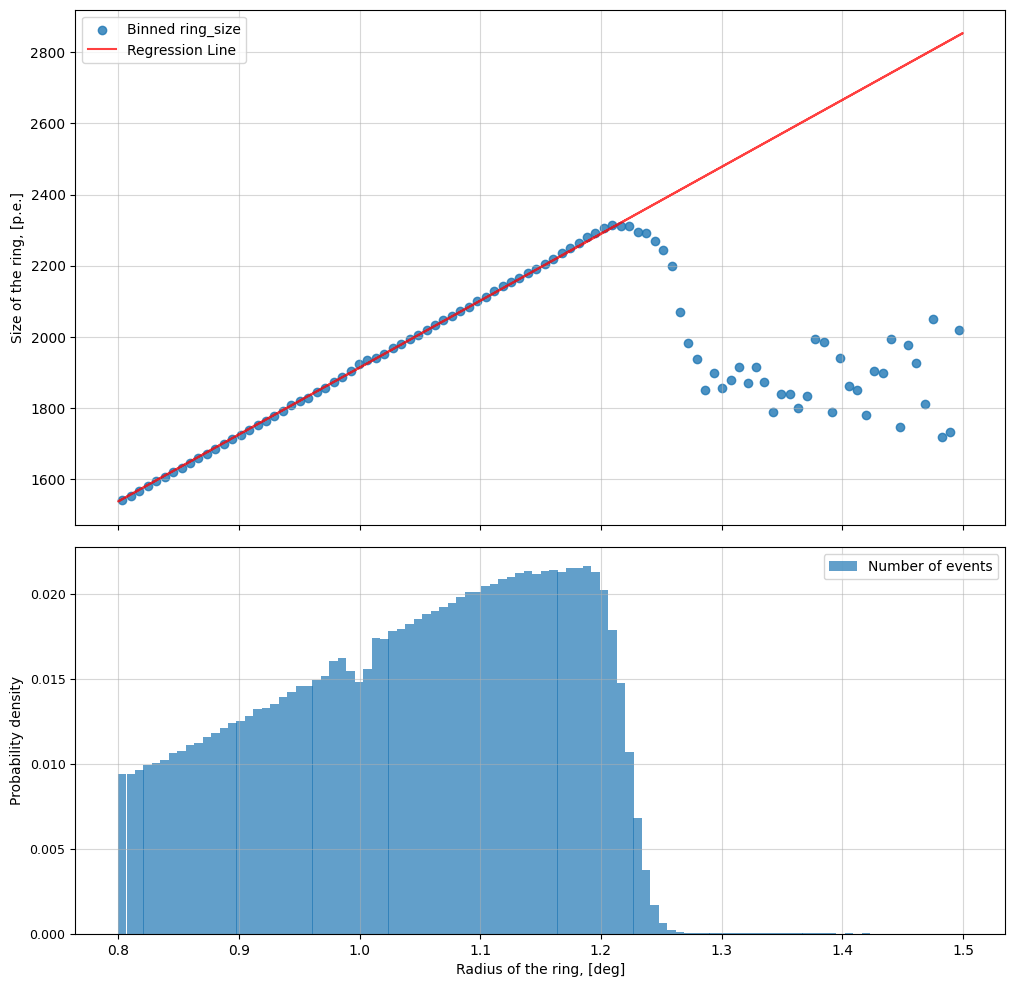

In [ ]:
x_value_str = 'ring_radius'
y_value_str = 'ring_size'

# Step 1: Create bins for 'ring_radius'
final_df[f'{x_value_str}_bin'] = pd.cut(final_df[x_value_str], bins=100)

# Step 2: Group by the new bin column and calculate mean 'ring_size' for each bin
binned_data = final_df.groupby(f'{x_value_str}_bin')[y_value_str].mean().reset_index()

# Step 3: Convert the bin intervals to strings (for plotting) or use midpoints
binned_data['bin_mid'] = binned_data[f'{x_value_str}_bin'].apply(lambda x: x.mid)

# Calculate number of elements in each bin
bin_counts = final_df.groupby(f'{x_value_str}_bin').size().reset_index(name='count')

# Merge the counts back with the mean calculations if needed
binned_data_with_counts = binned_data.merge(bin_counts, on=f'{x_value_str}_bin')


fig, axes = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 3]}, figsize=(12,12))
fig.subplots_adjust(hspace=0.05)
ax = axes[0]
ax.scatter(binned_data_with_counts['bin_mid'], binned_data_with_counts[y_value_str], label=f'Binned {y_value_str}', alpha = 0.8)
ax.set_ylabel('Size of the ring, [p.e.]')
m, b = np.polyfit(final_df[x_value_str], final_df[y_value_str], 1)
ax.plot(final_df[x_value_str], m*final_df[x_value_str] + b, color='red', label='Regression Line', alpha = 0.75)
ax.legend()
bx = axes[1]
x_pos = list(binned_data_with_counts['bin_mid'])
y_pos = np.array(binned_data_with_counts['count'])
y_pos = y_pos / sum(y_pos)
bx.bar(x_pos, y_pos, width=(max(x_pos)-min(x_pos))/(len(x_pos)-2), label="Number of events", alpha = 0.7)
#bx.set_ylim(0,25000)
bx.set_ylabel('Probability density')
ax.grid(alpha = 0.5)
bx.grid(alpha = 0.5)
bx.legend()

bx.tick_params(axis="y", labelsize=9)
# Scatter plot of binned values


plt.xlabel('Radius of the ring, [deg]')
plt.legend()
plt.grid(alpha=0.5)


In [ ]:
2+2